In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pprint as pp

In [1]:
# mpl.style.use( 'ggplot' )
markers = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H', 1, 2, 3, 4]

In [3]:
# Reference: https://stackoverflow.com/questions/49750107/how-to-remove-scientific-notation-on-a-matplotlib-log-log-plot
from matplotlib import ticker

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# formatter.set_powerlimits((-1, 1)) 

In [38]:
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_latex = {
    "text.usetex": True,            # use LaTeX to write all text
    "pgf.rcfonts": True,           # Ignore Matplotlibrc
    "pgf.preamble": r'\usepackage{xcolor}'     # xcolor for colours
}
mpl.rcParams.update(pgf_with_latex)

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{xcolor}')

In [14]:
paths = dict(
#     GISETTE='GISETTE_test0.05_10tr_36cores_algbrute.pickle',
    GISETTE='2021-02-03T15:37:13/GISETTE_test0.05_10tr_12cores_algkd_tree.pickle',
    HTRU2='HTRU2_test0.05_10tr_36cores_algkd_tree.pickle',
    CREDIT='CREDIT_test0.05_10tr_36cores_algkd_tree.pickle',
    MiniBooNE='MiniBooNE_test0.05_10tr_36cores_algkd_tree.pickle',
    SUSY='2021-02-03T09:12:08/SUSY_test0.05_10tr_28cores_algkd_tree.pickle',                            #
#     BNGLetter='2021-02-02T15:15:35/BNGLetter_test0.05_5tr_12cores_algkd_tree.pickle',                  #
#     BNGLetter='2021-02-03T02:35:49/BNGLetter_test0.05_10tr_12cores_algkd_tree.pickle',                  #
    YearPredictionMSD='2021-02-02T20:35:05/YearPredictionMSD_test0.05_10tr_12cores_algkd_tree.pickle',  #
)
data = dict.fromkeys(paths)
for key in data:
    filepath = '../results/backup/{}/{}'.format(key, paths[key])
    with open(filepath, 'rb') as handle:
        data[key] = pickle.load(handle)

In [39]:
data['GISETTE']['error_rates']['split_select1_1NN']

array([0.05428571, 0.04      , 0.05428571, 0.06285714, 0.04      ,
       0.03142857, 0.03428571, 0.06571429, 0.04857143, 0.05142857])

In [50]:
# labels = dict(standard_kNN=r'standard $k$-NN',
#               Msplit_1NN=r'$M$-split 1-NN',
#               Mbig_1NN=r'$M$-big 1NN')

labels_dict = dict(
    standard_kNN=r'$k$-NN',
    Msplit_1NN=r'(1,$M$)-NN',
    # Mbig_1NN=r'big 1NN'
)

Model selection validation profiles


/var/folders/p9/v1s296351mnf3yx7kphc3bq00000gn/T/ipykernel_8168/3722849467.py:51: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


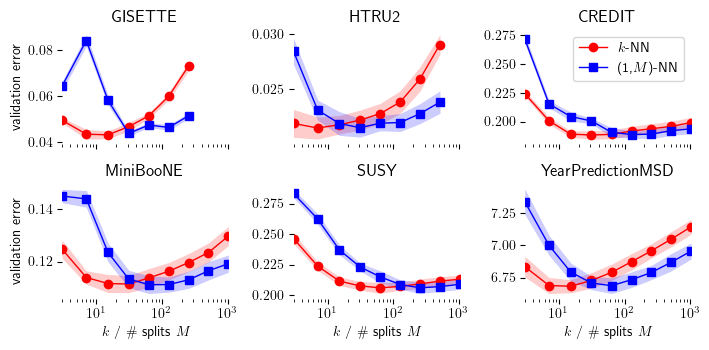

In [67]:
print("Model selection validation profiles\n")
fig, axes = plt.subplots(nrows=2, 
                         ncols=len(data)//2, 
                         figsize=(7.2, 3.6), 
                         sharex=True,
                         constrained_layout=True)
for j, datakey in enumerate(data):
    validation_profiles = data[datakey]['validation_profiles']
    n_trials = len(validation_profiles['standard_kNN'])
    # Plot validation profiles
    colors = ['red', 'blue']
    ax = axes.reshape((-1,))[j]
    for i, key in enumerate(['standard_kNN', 'Msplit_1NN']):
        if key == 'standard_kNN':
            param_set = validation_profiles[key][0][0]
        else:
            param_set = validation_profiles[key][0]['n_splits'][0]
        errs = np.zeros((n_trials, len(param_set)))
        for n in range(n_trials):
            if key == 'standard_kNN':
                errs[n] = validation_profiles[key][n][1]
            else:
                errs[n] = validation_profiles[key][n]['n_splits'][1]
        ax.plot(param_set,
                errs.mean(axis=0),
                linewidth=1,
                label=labels_dict[key],
                color=colors[i],
                marker=markers[i])
        ax.fill_between(param_set,
                        (errs.mean(axis=0) - errs.std(axis=0)),
                        (errs.mean(axis=0) + errs.std(axis=0)),
                        linewidth=0.1,
                        alpha=0.2,
                        color=colors[i])
    ax.set_xscale('log', nonpositive='clip')
    ax.set_xlim([2.5, 1152])
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.spines[['left', 'bottom', 'right', 'top']].set_visible(False)
    if j >= 3:
        pass
        ax.set_xlabel(r'\textcolor{red}{$k$} / \textcolor{blue}{\# splits $M$}')
    ax.set_title(datakey)
#     ax.set_title('{} ({}-fold; {} runs)'.format(datakey, data[datakey]['args'].n_folds, n_trials))
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.set_minor_formatter(formatter)
    if j == 2:
        ax.legend()
    if j in [0, 3]:
        ax.set_ylabel('validation error')
fig.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt.savefig('jmlr/validation_profile_summary.pdf', bbox_inches='tight')